In [31]:
import numpy as np
import pandas as pd

import pickle

import importlib

import russia_df_utils
importlib.reload(russia_df_utils)
from russia_df_utils import get_uncategorized_df_rows, get_data

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13

In [4]:
russia_df = get_data()


In [5]:
russia_df.reset_index(inplace=True)
russia_df.set_index('created_datetime',drop=False, inplace=True)

In [6]:
busiest_window_start = '2016-6-1'
busiest_window_end = '2017-7-1'

hourly_window_start = '2016-10-6'
hourly_window_end = '2016-10-7'

In [7]:
def get_tweets_in_busiest_window(df):
    return df.loc[busiest_window_start:busiest_window_end]

def generate_time_window_counts(df):
    monthly_tweets = df.resample('M')
    counts_per_month = monthly_tweets['id'].count()
    
    busiest_window = get_tweets_in_busiest_window(df)
    daily_tweets = busiest_window.resample('D')
    counts_per_day = daily_tweets['id'].count()
    
    busy_month_sample = df.loc[hourly_window_start:hourly_window_end]
    hourly_tweets = busy_month_sample.resample('H')
    counts_per_hour = hourly_tweets['id'].count()
    return [counts_per_month, counts_per_day, counts_per_hour]

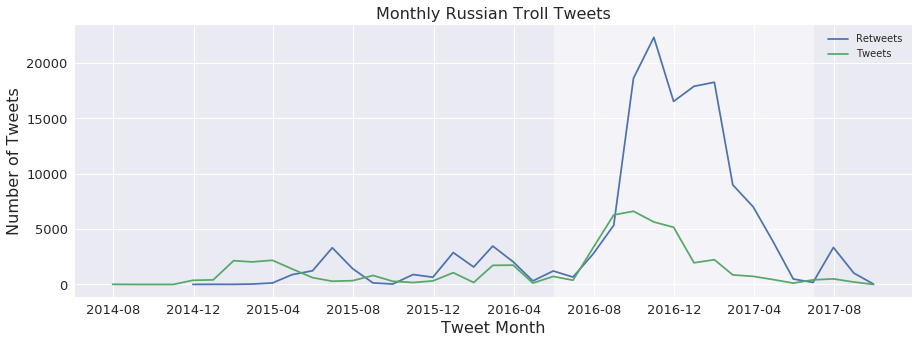

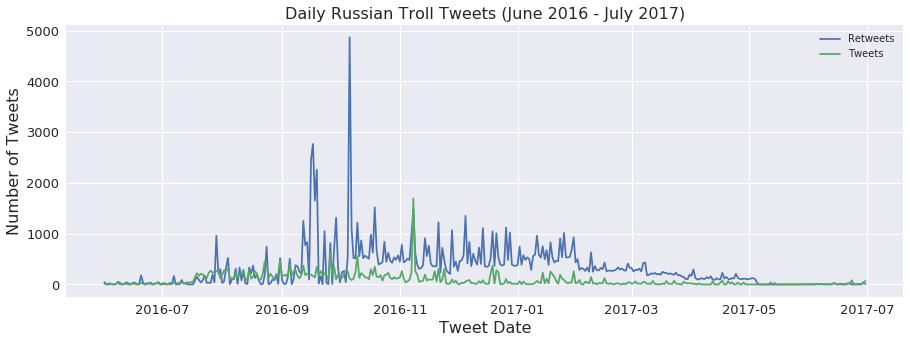

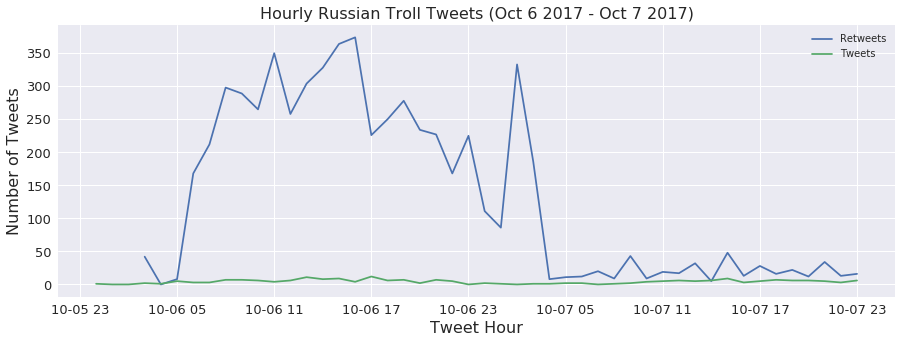

In [8]:
retweets = generate_time_window_counts(russia_df[russia_df['is_rt'] == True])
tweets = generate_time_window_counts(russia_df[russia_df['is_rt'] == False])

plt.figure(figsize=(15,5))
plt.plot(retweets[0])
plt.plot(tweets[0])
plt.axvspan(busiest_window_start, busiest_window_end, facecolor='white', alpha=0.5)
plt.xlabel('Tweet Month')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Monthly Russian Troll Tweets')

plt.figure(figsize=(15,5))
plt.plot(retweets[1])
plt.plot(tweets[1])
#plt.axvspan(hourly_window_start, hourly_window_end, facecolor='red', alpha=0.5)
plt.xlabel('Tweet Date')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Daily Russian Troll Tweets (June 2016 - July 2017)');

plt.figure(figsize=(15,5))
plt.plot(retweets[2])
plt.plot(tweets[2])
plt.xlabel('Tweet Hour')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Hourly Russian Troll Tweets (Oct 6 2017 - Oct 7 2017)');

In [9]:
busiest_tweets = get_tweets_in_busiest_window(russia_df[russia_df['is_rt'] == True])

busiest_tweets.head(5)

,id,user_id,user_key,retweet_count,retweeted,favorite_count,text,tweet_id,source,expanded_urls,retweeted_status_id,in_reply_to_status_id,created_datetime,processed_text,@midnight,merkel,is_rt
created_datetime,,,,,,,,,,,,,,,,,
2017-02-22 07:43:43,3ca0ddfb-fb8d-453e-a0f9-7c58ba36ae14,1.710805e+09,cookncooks,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],NaN,NaN,2017-02-22 07:43:43,@ltapoll: Who was/is the best president of th...,False,False,True
2016-12-26 10:06:41,955a8bb6-475b-45e4-ad04-ede11e56f41e,2.584153e+09,queenofthewo,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,[],NaN,NaN,2016-12-26 10:06:41,@jww372: I don't have to guess your religion!...,False,False,True
2017-03-07 13:11:44,b77ae8a1-38e2-4364-998e-b17d4c4e14e2,1.658421e+09,baobaeham,NaN,NaN,NaN,RT @MDBlanchfield: You’ll never guess who twee...,8.391768e+17,NaN,[],NaN,NaN,2017-03-07 13:11:44,@MDBlanchfield: You’ll never guess who tweete...,False,False,True
2016-12-30 07:49:30,6a13675e-5df9-4592-9ae9-3712b6f0a29b,2.587101e+09,judelambertusa,NaN,NaN,NaN,RT @100PercFEDUP: New post: WATCH: DIAMOND AND...,8.148157e+17,NaN,[],NaN,NaN,2016-12-30 07:49:30,@100PercFEDUP: New post: WATCH: DIAMOND AND S...,False,False,True
2016-10-29 20:48:19,78b39b0b-c2f7-42ea-8e33-614da47dee89,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @AriaWilsonGOP: 3 Women Face Charges After ...,7.925436e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""http://www.Feed24hNews.com/4MzaL""]",7.925391e+17,NaN,2016-10-29 20:48:19,@AriaWilsonGOP: 3 Women Face Charges After Be...,False,False,True


In [10]:
busiest_tweets[(busiest_tweets['user_key'] == 'ameliebaldwin')]

,id,user_id,user_key,retweet_count,retweeted,favorite_count,text,tweet_id,source,expanded_urls,retweeted_status_id,in_reply_to_status_id,created_datetime,processed_text,@midnight,merkel,is_rt
created_datetime,,,,,,,,,,,,,,,,,
2016-10-29 20:48:19,78b39b0b-c2f7-42ea-8e33-614da47dee89,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @AriaWilsonGOP: 3 Women Face Charges After ...,7.925436e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""http://www.Feed24hNews.com/4MzaL""]",7.925391e+17,NaN,2016-10-29 20:48:19,@AriaWilsonGOP: 3 Women Face Charges After Be...,False,False,True
2016-09-09 04:11:25,33062571-04cc-4d0d-87b5-a7fcd2e8b2fd,1.679279e+09,ameliebaldwin,0.0,False,0.0,"RT @Gumball55668882: DEMOCRATS,,WOMEN ,,BILL C...",7.741734e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],7.740530e+17,NaN,2016-09-09 04:11:25,"@Gumball55668882: DEMOCRATS,,WOMEN ,,BILL @Hi...",False,False,True
2016-09-16 02:00:11,ff35f3e6-9837-4efb-b710-f3e0796f011b,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @Rammer_Jammer84: I don't know about Hilary...,7.766770e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],7.752938e+17,NaN,2016-09-16 02:00:11,@Rammer_Jammer84: I don't know about Hilary @...,False,False,True
2016-09-17 00:48:17,fc8f4353-a5a2-43c0-b061-e54ae99cce78,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @steph93065: Hillary Clinton: Donald Trump’...,7.770213e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""http://www.breitbart.com/2016-presidential-r...",7.769933e+17,NaN,2016-09-17 00:48:17,@steph93065: @HillaryClinton: @realDonaldTrum...,False,False,True
2016-10-07 10:01:18,37319b60-ccfb-4b8e-9f6c-3a8bdb622bd2,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @handley_dix: So was John Gotti. Does that ...,7.844083e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""""]",7.843806e+17,NaN,2016-10-07 10:01:18,@handley_dix: So was John Gotti. Does that me...,False,False,True
2017-01-11 15:51:21,a83acea4-d579-4c7f-bf35-e3a27696e0c8,1.679279e+09,ameliebaldwin,NaN,NaN,NaN,RT @realjunsonchan: I will replay this for hou...,8.192856e+17,NaN,[],NaN,NaN,2017-01-11 15:51:21,@realjunsonchan: I will replay this for hours...,False,False,True
2016-09-17 06:02:09,722da2be-9c0f-4973-95db-8a7f208779e6,1.679279e+09,ameliebaldwin,0.0,False,0.0,"RT @ish10040: Trump: Clinton’s ""Basket of Depl...",7.771003e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""http://truthfeed.com/trump-clintons-basket-o...",7.770893e+17,NaN,2016-09-17 06:02:09,@ish10040: @realDonaldTrump: @HillaryClinton’...,False,False,True
2017-01-31 12:45:28,c39eff74-ca66-4012-8a28-8a8d1f080d20,1.679279e+09,ameliebaldwin,NaN,NaN,NaN,RT @RepRepublic: @vbspurs I find it very conde...,8.264866e+17,NaN,[],NaN,NaN,2017-01-31 12:45:28,@RepRepublic: @vbspurs I find it very condesc...,False,False,True
2017-01-21 18:40:23,ffcacefe-5b33-4d5e-a42d-36c84112a19a,1.679279e+09,ameliebaldwin,NaN,NaN,NaN,RT @wilderpone: Are you SURE Pizzagate is fake...,8.229520e+17,NaN,[],NaN,NaN,2017-01-21 18:40:23,@wilderpone: Are you SURE Pizzagate is fake n...,False,False,True


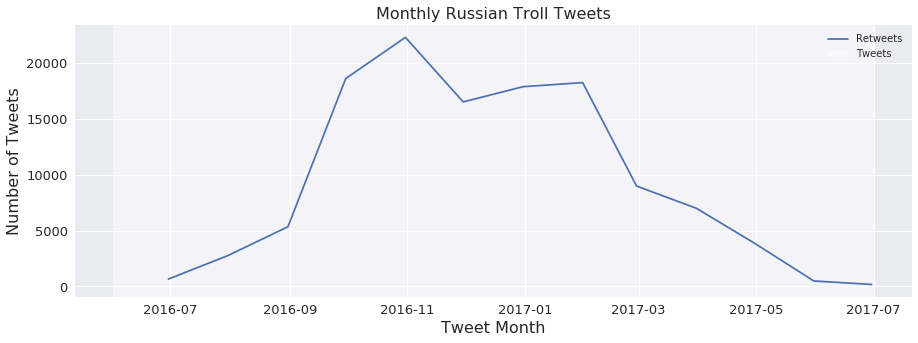

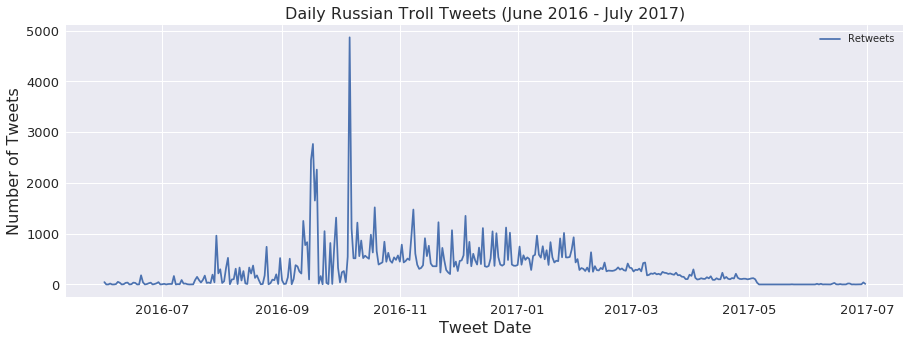

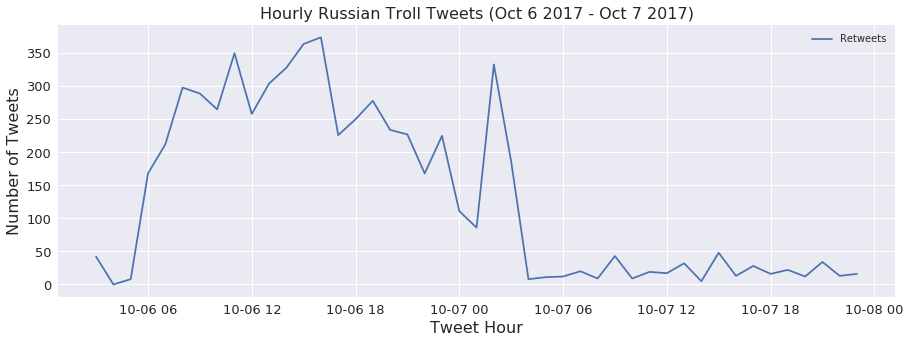

In [11]:
retweets = generate_time_window_counts(busiest_tweets)

plt.figure(figsize=(15,5))
plt.plot(retweets[0])
plt.axvspan(busiest_window_start, busiest_window_end, facecolor='white', alpha=0.5)
plt.xlabel('Tweet Month')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Monthly Russian Troll Tweets')

plt.figure(figsize=(15,5))
plt.plot(retweets[1])
#plt.axvspan(hourly_window_start, hourly_window_end, facecolor='red', alpha=0.5)
plt.xlabel('Tweet Date')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Daily Russian Troll Tweets (June 2016 - July 2017)');

plt.figure(figsize=(15,5))
plt.plot(retweets[2])
plt.xlabel('Tweet Hour')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Hourly Russian Troll Tweets (Oct 6 2017 - Oct 7 2017)');

# LDA Analysis #
** I generated LDA probabilities for 15 topics over 150 passes, here's where I'm going to look at the tweets over time **

In [15]:
# 10 = gun tweets 
lda_df = pd.read_csv('../csvs/km_lda_15_150passes.csv', index_col='id')
lda_df['created_datetime'] = pd.to_datetime(lda_df['created_datetime'])
lda_df.reset_index(inplace=True)
lda_df.set_index('created_datetime',drop=False, inplace=True)
lda_df.head(5)

,id,user_id,user_key,retweet_count,retweeted,favorite_count,text,tweet_id,source,expanded_urls,...,lda_topic_5,lda_topic_6,lda_topic_7,lda_topic_8,lda_topic_9,lda_topic_10,lda_topic_11,lda_topic_12,lda_topic_13,lda_topic_14
created_datetime,,,,,,,,,,,,,,,,,,,,,
2016-03-22 13:31:42,ae88d526-dc1f-4d71-83de-45d2c18cbaee,1.868981e+09,ryanmaxwell_1,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,[],...,0.000000,0.000000,0.000000,0.000000,0.000000,0.203660,0.000000,0.709673,0.000000,0.000000
2016-10-10 15:57:00,902bc8b3-7d52-4043-bbb9-2960f8449b83,2.571870e+09,detroitdailynew,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...","[""http://detne.ws/2e172jF""]",...,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.182909,0.011111,0.011111,0.672647
2016-10-26 10:33:58,43645b14-33a9-4d4f-8107-b6443d04e805,2.882014e+09,giselleevns,NaN,NaN,NaN,"@ModicaGiunta me, too!",7.913019e+17,NaN,[],...,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
2016-03-16 14:07:39,4478effe-7c8b-4641-8112-07b125038925,1.649488e+09,hiimkhloe,NaN,NaN,NaN,One of the ways to remind that #BlackLivesMatt...,7.101807e+17,NaN,[],...,0.184422,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.344444
2016-08-30 20:49:22,b3ff5e36-b25c-4dc3-8549-6edf31bed87d,4.272871e+09,pamela_moore13,138.0,False,139.0,"Dave Chappelle: ""Black Lives Matter"" is the wo...",7.708006e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],...,0.264523,0.000000,0.295141,0.000000,0.000000,0.000000,0.000000,0.229630,0.000000,0.000000


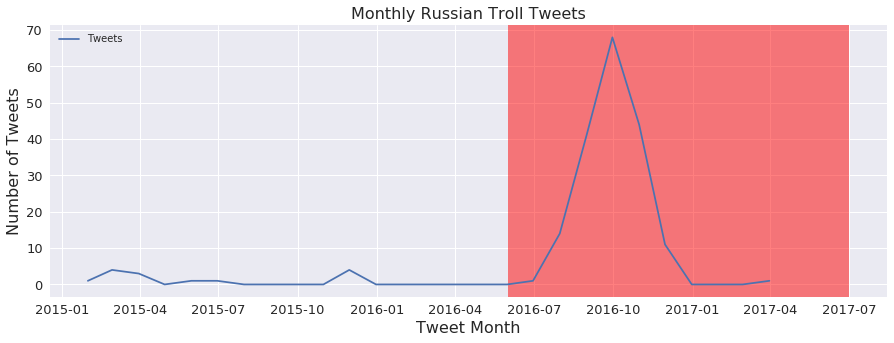

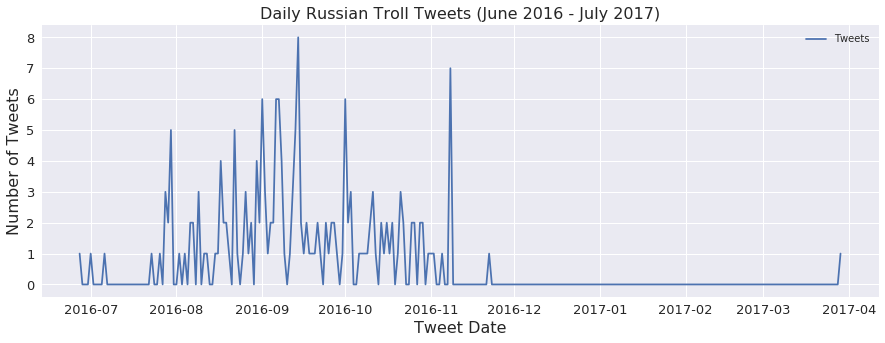

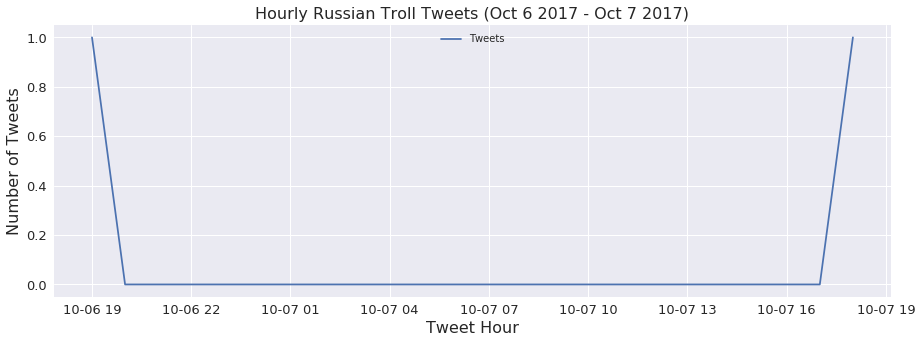

In [29]:
lda_topic = 'lda_topic_14'
tweets_to_look_at = lda_df[lda_df[lda_topic] >= .80]
lda_tweets = generate_time_window_counts(tweets_to_look_at)

plt.figure(figsize=(15,5))
plt.plot(lda_tweets[0])
plt.axvspan(busiest_window_start, busiest_window_end, facecolor='red', alpha=0.5)
plt.xlabel('Tweet Month')
plt.ylabel('Number of Tweets')
plt.legend(['Tweets'])
plt.title('Monthly Russian Troll Tweets')

plt.figure(figsize=(15,5))
plt.plot(lda_tweets[1])
#plt.axvspan(hourly_window_start, hourly_window_end, facecolor='red', alpha=0.5)
plt.xlabel('Tweet Date')
plt.ylabel('Number of Tweets')
plt.legend(['Tweets'])
plt.title('Daily Russian Troll Tweets (June 2016 - July 2017)');

plt.figure(figsize=(15,5))
plt.plot(lda_tweets[2])
plt.xlabel('Tweet Hour')
plt.ylabel('Number of Tweets')
plt.legend(['Tweets'])
plt.title('Hourly Russian Troll Tweets (Oct 6 2017 - Oct 7 2017)');

In [30]:
tweets_to_look_at[['user_key', 'text', lda_topic]]

,user_key,text,lda_topic_14
created_datetime,,,
2016-09-26 18:31:39,tpartynews,Newest National Poll: DonaldTrump leads Hillar...,0.836461
2016-08-17 13:27:10,kansasdailynews,How the Trump and Clinton tax plans would affe...,0.819705
2016-08-07 14:53:34,ten_gop,@HillaryClinton always claims she supports wo...,0.848095
2016-08-12 15:10:29,todaymiami,PolitiFact checks Trump and Clinton's recent c...,0.866667
2016-09-26 12:43:07,thefoundingson,According to Hillary's staffers she looks like...,0.800524
2015-06-17 18:31:07,westernwindwes,Some of Clinton's Libya emails said to be with...,0.883333
2016-09-07 20:22:57,ten_gop,POLL AMONG VETERANS: Donald Trump 89% \nHillar...,0.883333
2016-09-27 05:11:20,philadelphiaon,"Trump, Clinton clash on jobs, ISIS, temperamen...",0.883333
2016-09-07 21:51:33,pamela_moore13,"Conway on polls tightening: ""Mr. Trump doing t...",0.829825
